In [415]:
%matplotlib inline
import numpy as np
from pylab import *

In [416]:
A = '''
...xx...
..x..x..
.x....x.
x......x
xxxxxxxx
x......x
x......x
x......x
'''

In [417]:
X = '''
x......x
.x....x.
..x..x..
...xx...
...xx...
..x..x..
.x....x.
x......x
'''

In [418]:
I = '''
xxxxxxxx
...xx...
...xx...
...xx...
...xx...
...xx...
...xx...
xxxxxxxx
'''

In [419]:
seven = '''
xxxxxxxx
.......x
.......x
.......x
.......x
.......x
.......x
.......x
'''

In [420]:
def generate_pattern_vector(pattern):
    return np.array([1 if cell=='x' else -1 for cell in pattern.replace('\n','')])

In [421]:
vector_A = generate_pattern_vector(A)
vector_X = generate_pattern_vector(X)
vector_I = generate_pattern_vector(I)
vector_7 = generate_pattern_vector(seven)

patterns = [vector_A, vector_X, vector_I, vector_7]

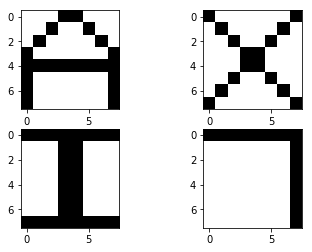

In [422]:
fig = plt.figure()
i=221
for pattern in patterns:
    plt.subplot(i)
    plt.imshow(pattern.reshape((8,8)), cmap=cm.binary)
    i+=1

In [423]:
def generate_weight_matrix(patterns):
    N = np.shape(patterns[0])[0]
    identity = np.identity(N)
    w_matrix = np.zeros((N,N))
    for pattern in patterns:
        w_matrix = w_matrix + (np.outer(pattern,pattern)-identity)
    
    return w_matrix

In [424]:
weight_matrix = generate_weight_matrix(patterns)
weight_matrix

array([[ 0.,  2.,  2., ...,  0.,  0.,  2.],
       [ 2.,  0.,  4., ...,  2.,  2.,  0.],
       [ 2.,  4.,  0., ...,  2.,  2.,  0.],
       ...,
       [ 0.,  2.,  2., ...,  0.,  4., -2.],
       [ 0.,  2.,  2., ...,  4.,  0., -2.],
       [ 2.,  0.,  0., ..., -2., -2.,  0.]])

In [426]:
def simulate(input_vector, w_matrix):
    N = np.shape(w_matrix)[0]
    print(N)
    c=1
    while True:
        print(c)
        indices = np.arange(N)
        np.random.shuffle(indices)
        x = input_vector.copy()
        for i in range(N):
            idx = indices[i];
            temp = np.dot(w_matrix[:,idx],input_vector)
            temp = 1 if temp>=0 else -1
            input_vector[idx]=temp
        if np.array_equal(x,input_vector):
            break
        c+=1
    return input_vector

[ 1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1  1
 -1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1]
64
1
2
3


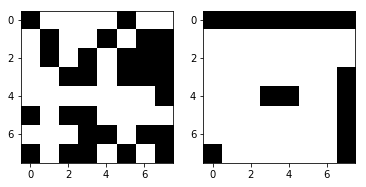

In [433]:
test_vector = 2*np.random.randint(2, size=64)-1
print(test_vector)
fig = plt.figure()
plt.subplot(121)
plt.imshow(test_vector.reshape((8,8)), cmap=cm.binary)
test_result = simulate(test_vector, weight_matrix)
plt.subplot(122)
plt.imshow(test_result.reshape((8,8)), cmap=cm.binary, interpolation="nearest")